# Unit 5 - Financial Planning

In [141]:
# Initial imports
import os
import requests
import json
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

In [142]:
# Load .env enviroment variables
load_dotenv()

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [143]:
# Set current amount of crypto assets
my_btc = 1.2
my_eth = 5.3

In [144]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=USD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=USD"

In [145]:
# Fetch current BTC price
btc_API_response = requests.get(btc_url)

#print(btc_API_response.text)

btc_API_response_json = btc_API_response.json()
btc_API_response_json




# Fetch current ETH price
eth_API_response = requests.get(eth_url)

#print(eth_API_response.text)

eth_API_response_json = eth_API_response.json()
eth_API_response_json




# Compute current value of my crpto
current_btc_price = btc_API_response_json["data"]["1"]["quotes"]["USD"]["price"]
my_btc_value = current_btc_price * my_btc

current_eth_price = eth_API_response_json["data"]["1027"]["quotes"]["USD"]["price"]
my_eth_value = current_eth_price * my_eth




# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")

The current value of your 1.2 BTC is $23746.97
The current value of your 5.3 ETH is $8484.29


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [146]:
# Set current amount of shares
my_agg = 200
my_spy = 50

In [147]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_api_secret_key = os.getenv("ALPACA_SECRET_KEY")

# Create the Alpaca API object
alpaca_data = tradeapi.REST(
    alpaca_api_key,
    alpaca_api_secret_key,
    api_version="v2")

In [148]:
# Format current date as ISO format
current_day = pd.Timestamp("2022-09-02", tz="America/New_York").isoformat()

# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to "1Day" for Alpaca API
timeframe = "1Day"

# Get current closing prices for SPY and AGG
my_portfolio = alpaca_data.get_bars(
    tickers,
    timeframe,
    start = current_day,
    end = current_day
).df

my_portfolio

# Reorganize the DataFrame
# Separate ticker data
AGG = my_portfolio[my_portfolio['symbol']=='AGG'].drop('symbol', axis=1)
SPY = my_portfolio[my_portfolio['symbol']=='SPY'].drop('symbol', axis=1)

# Concatenate the ticker DataFrames
my_portfolio = pd.concat([AGG, SPY], axis=1, keys=['AGG','SPY'])

# Preview DataFrame
my_portfolio

AGG                                   \
                             open    high     low   close   volume   
timestamp                                                            
2022-09-02 04:00:00+00:00  100.37  100.67  100.13  100.36  5963968   

                                                     SPY                   \
                          trade_count        vwap   open     high     low   
timestamp                                                                   
2022-09-02 04:00:00+00:00       18228  100.362232  400.3  401.555  390.33   

                                                                     
                            close    volume trade_count        vwap  
timestamp                                                            
2022-09-02 04:00:00+00:00  392.24  98944421      637607  395.381705

In [149]:
# Pick AGG and SPY close prices
current_agg_price = my_portfolio["AGG"]["close"][0]
current_spy_price = my_portfolio["SPY"]["close"][0]

# Print AGG and SPY close prices
print(f"Current AGG closing price: ${current_agg_price}")
print(f"Current SPY closing price: ${current_spy_price}")

Current AGG closing price: $100.36
Current SPY closing price: $392.24


In [151]:
# Compute the current value of shares
my_agg_value = current_agg_price * my_agg
my_spy_value = current_spy_price * my_spy

# Print current value of shares
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")

The current value of your 50 SPY shares is $19612.00
The current value of your 200 AGG shares is $20072.00


### Savings Health Analysis

In [169]:
# Set monthly household income
monthly_income = 12000

# Consolidate financial assets data
member_assets_df = pd.DataFrame([my_btc_value, my_eth_value, my_agg_value, my_spy_value])
member_assets_df.set_axis(["my_btc_value", "my_eth_value", "my_agg_value", "my_spy_value"], axis="index", inplace=True)
member_assets_df.set_axis(["amount"], axis="columns", inplace=True)
member_assets_df

# Create savings DataFrame
df_savings = pd.DataFrame([(my_btc_value + my_eth_value), (my_agg_value + my_spy_value)])
df_savings.set_axis(["crypto", "shares"], axis="index", inplace=True)
df_savings.set_axis(["amount"], axis="columns", inplace=True)

# Display savings DataFrame
display(df_savings)

,amount
crypto,32231.261
shares,39684.000


array([<AxesSubplot:ylabel='amount'>], dtype=object)

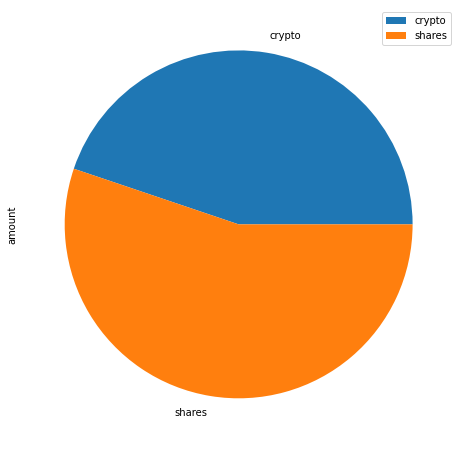

In [176]:
# Plot savings pie chart
df_savings.plot.pie(figsize=(8, 8), subplots=True)

In [205]:
# Set ideal emergency fund
months_needed = 3
emergency_fund = monthly_income * months_needed

# Calculate total amount of savings
total_savings = df_savings["amount"][0] + df_savings["amount"][1]

# Validate saving health

short_emergency_fund = emergency_fund - total_savings

if total_savings > emergency_fund:
    print(f"Congratulations!  Your current savings of ${total_savings:0.2f}, are more than sufficient in the case of an emergency.")
elif total_savings == emergency_fund:
    print(f"Your current savings of ${total_savings:0.2f}, are enough to cover you in case of an emergency - we suggest at least {months_needed} months income in an emergency fund.")
elif total_savings < emergency_fund:
    print(f"Please be aware:  Your current savings of ${total_savings:0.2f}, are not sufficient to cover you in case of an emergency - we suggest at least {months_needed} months income in an emergency fund.  In order to meet\
 this goal, you will need to save the following amount: ${short_emergency_fund:0.2f}.")


Congratulations!  Your current savings of $71915.26, are more than sufficient in the case of an emergency.


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [ ]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2016-05-01', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2021-05-01', tz='America/New_York').isoformat()

In [ ]:
# Get 5 years' worth of historical data for SPY and AGG
# YOUR CODE HERE!

# Reorganize the DataFrame
# Separate ticker data
# YOUR CODE HERE!


# Concatenate the ticker DataFrames
# YOUR CODE HERE!

# Display sample data
df_stock_data.head()

In [ ]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
# YOUR CODE HERE!

In [ ]:
# Printing the simulation input data
# YOUR CODE HERE!

In [ ]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
# YOUR CODE HERE!

In [ ]:
# Plot simulation outcomes
# YOUR CODE HERE!

In [ ]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!

### Retirement Analysis

In [ ]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!

# Print summary statistics
# YOUR CODE HERE!

### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `$20,000` initial investment.

In [ ]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
# YOUR CODE HERE!

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [ ]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
# YOUR CODE HERE!

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [ ]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
# YOUR CODE HERE!

In [ ]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
# YOUR CODE HERE!

In [ ]:
# Plot simulation outcomes
# YOUR CODE HERE!

In [ ]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!

In [ ]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!

# Print summary statistics
# YOUR CODE HERE!

In [ ]:
# Set initial investment
# YOUR CODE HERE!

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
# YOUR CODE HERE!

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")

### Ten Years Retirement Option

In [ ]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
# YOUR CODE HERE!

In [ ]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
# YOUR CODE HERE!

In [ ]:
# Plot simulation outcomes
# YOUR CODE HERE!

In [ ]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!

In [ ]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!

# Print summary statistics
# YOUR CODE HERE!

In [ ]:
# Set initial investment
# YOUR CODE HERE!

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
# YOUR CODE HERE!

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")